We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please go to the Unix shell and type:

`sudo pip install -U pandas`

It will take a few minutes to get everything installed.

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

Let's take a look at the restaurant inspections file (at /home/ubuntu/data/restaurants.csv), which we used in our earlier classes.

If you do not have it, then type the following in the shell:

`curl 'https://dl.dropboxusercontent.com/u/16006464/DwD_Winter2015/restaurant.zip' -o /home/ubuntu/data/restaurant.zip`

`unzip /home/ubuntu/data/restaurant.zip -d /home/ubuntu/data/`


In [4]:
!head -5 /home/ubuntu/data/restaurant.csv

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
30075445,MORRIS PARK BAKE SHOP,BRONX,1007      ,MORRIS PARK AVE                                   ,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",Not Critical,2,A,03/03/2014,01/14/2015,Cycle Inspection / Initial Inspection
30075445,MORRIS PARK BAKE SHOP,BRONX,1007      ,MORRIS PARK AVE                                   ,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of this inspection.,,,Not Applicable,,,,01/14/2015,Trans Fat / Second Compliance Inspection
3007544

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [5]:
restaurants = pd.read_csv("/home/ubuntu/data/restaurant.csv", 
                          dtype=unicode, encoding="utf-8")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [6]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE ...,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,03/03/2014,01/14/2015,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE ...,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,01/14/2015,Trans Fat / Second Compliance Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE ...,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6,A,09/11/2013,01/14/2015,Cycle Inspection / Re-inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE ...,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,6,A,09/11/2013,01/14/2015,Cycle Inspection / Re-inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE ...,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,32,NaN,NaN,01/14/2015,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [7]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,515589,515428,515589,514902,515589,515587,515500,515589,515589,514812,504695,504676,515589,481977,228633,227141,515589,514813
unique,25326,20590,6,10307,4868,212,24208,84,1330,5,96,101,3,121,7,1208,1,35
top,40699772,SUBWAY,MANHATTAN,0,BROADWAY,10003,7186566210,American,12/17/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,06/26/2014,01/14/2015,Cycle Inspection / Initial Inspection
freq,116,4861,211251,2237,12359,14790,313,124379,1053,482524,65550,65550,283205,38617,157683,612,515589,281832


In [8]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])

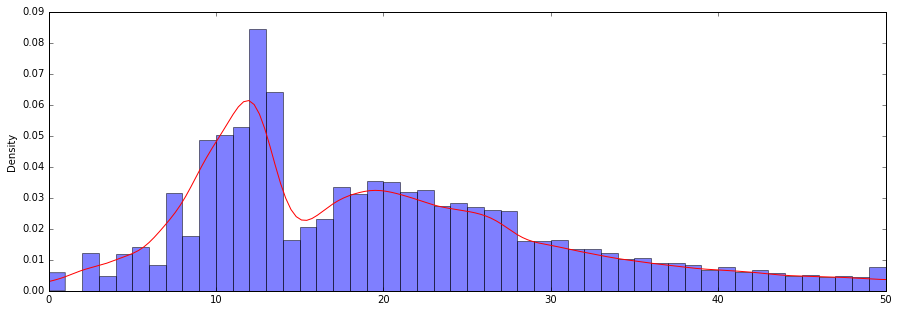

In [22]:
ax = restaurants["SCORE"].hist(bins=50, alpha=0.5, range=(0,50), normed=True)

restaurants["SCORE"].plot(kind='kde', color='Red', xlim=(0,50), ax=ax)

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [ ]:
restaurants["VIOLATION CODE"].head(5)

In [ ]:
restaurants[["GRADE DATE","VIOLATION CODE", "DBA"]].head(5)

We can also get quick statistics about the common values that appear in each column:

In [ ]:
restaurants["DBA"].value_counts()

In [ ]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

In [ ]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

And we can use the "plot" command to plot the resulting histogram:

In [ ]:
violation_counts[:10].plot(kind='bar')

In [ ]:
popular[:10].plot(kind='bar')

#### Using the map command

The map command in Python has the following syntax:

`map(function, [list of values for first argument], [list of values for second argument]...)`

It takes as input a function, which has a set of parameters. Then, it iterates over the lists that follow; the lists contain the arguments that are passed to the function. Map returns a list of values that are the result of applying the function to all the elements of the list(s). 

For example, in the following code, the `add` function is going to be applied to the two lists (`[1, 2, 3, 4]` and `[9, 10, 10, 11]`) that follow. The result of the map will be a list containing the values `[add(1,2), add(2,10), add(3,10), add(4,11)]`




In [ ]:
def add(x,y):
    return x+y
    
example = map(add, [1, 2, 3, 4], [9, 10, 10, 11])
example

#### Using the map for dataframes

Using the map command, we can:
* Create new columns for the dataframe
* Modify existing columns
* Generate new columns that are the result of operations on the columns of the dataframe

For example, suppose that we want to format the phone column. We can write a function that takes as input a phone and formats it as we want. Then we apply the function using the map command as follows:

In [ ]:
restaurants['PHONE']

In [ ]:
import re
def formatPhone(phoneString):
    regex = re.compile(r'([2-9]\d{2})\W*(\d{3})\W*(\d{4})')
    match = regex.search(str(phoneString))
    if match:
        area_code = match.group(1)
        first_three = match.group(2)
        last_four = match.group(3)
        formatted = "(" + area_code + ") " + first_three + "-" + last_four
        return formatted
    else:
        return None

In [ ]:
print formatPhone("2129980803")

In [ ]:
import re

def formatPhone(phoneString):
    
    regex = re.compile(r'([2-9]\d{2})\W*(\d{3})\W*(\d{4})')
    match = regex.search(str(phoneString))
    if match:
        formatted = "(" + match.group(1) + ") " + match.group(2) + "-" + match.group(3)
        return formatted
    else:
        return "None"
    
restaurants['FormattedPhone'] = map(formatPhone, restaurants['PHONE'])

In [ ]:
restaurants[['PHONE', 'FormattedPhone']]

In [ ]:
def printAddress(boro, building, street, zipcode, phone):
    if building == None:
        building = ""
    if street == None:
        street = ""
    if boro == None:
        boro = ""
    if zipcode == None:
        zipcode = ""
    if phone == None:
        phone = ""
    
    result = str(building) + " " + street + " " + \
            boro + ", " + unicode(zipcode)    "\nPhone: " + formatPhone(phone)         
    return result

print printAddress("Manhattan", "44", "West 4th", "10012", "2129980803")

restaurants["FormattedAddress"] = map(printAddress, 
                                     restaurants["BORO"],
                                     restaurants["BUILDING"],
                                     restaurants["STREET"],
                                     restaurants["ZIPCODE"],
                                     restaurants["PHONE"])

In [ ]:
restaurants[["FormattedAddress", "STREET", "BUILDING", "BORO"]]


### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [ ]:
is_08A = (restaurants["VIOLATION CODE"] == "08A")
inspections08A = restaurants[is_08A]
inspections08A["DBA"].value_counts()[:10]

And we can use more complex conditions:

In [ ]:
is_08A_manhattan = (restaurants["VIOLATION CODE"] == "08A") \
                    & (restaurants["BORO"] == "MANHATTAN")
inspections08A_in_manhattan = restaurants[is_08A_manhattan]
inspections08A_in_manhattan["DBA"].value_counts()[:10].plot(kind='bar')

In [ ]:
restaurants[["VIOLATION CODE", "VIOLATION DESCRIPTION"]]

## Reading Excel files

Pandas make it trivially easy to read the contents of Excel files. For example, I stored the restaurant inspection dataset as an excel file. Let's grab it and get it stored locally:

In [ ]:
!curl -L -s "https://dl.dropboxusercontent.com/u/16006464/DwD_Fall2014/Restaurants.xlsx" -o Restaurants.xlsx

To read the Excel file, pandas uses the xlrd package. It is already installed in your machine, but if not, then type this in the shell:

`sudo pip install xlrd`

In [ ]:
import pandas as pd
restaurantsExcelFile = pd.ExcelFile("Restaurants.xlsx");

Read the worksheet named "WebExtract"

In [ ]:
tableWebExtract = restaurantsExcelFile.parse(sheetname="WebExtract");

In [ ]:
tableViolationCodes = restaurantsExcelFile.parse(sheetname='Violation');

In [ ]:
tableWebExtract

In [ ]:
tableViolationCodes

### Comparison with SQL

For a comparison with SQL, see http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

Pandas supports its own set of operators for doing SQL-like operations (in reality it runs a in-memory SQL database in the backend). It is also possible to use straightforward SQL queries to query Pandas dataframes, by using the `pandasql` package:

In [ ]:
!sudo -H pip install -U pandasql

In [ ]:
from pandasql import sqldf

In [ ]:
# PandaSQL does not like column names with spaces. So we will rename (some of) them.
restaurants.rename(columns={"VIOLATION CODE": "VIOLATION"}, inplace = True)

In [ ]:
rest = restaurants[["DBA", "BORO", "VIOLATION", "SCORE"]]

In [ ]:
q  = """
SELECT BORO, VIOLATION, COUNT(*) AS CNT 
FROM
  rest
GROUP BY BORO, VIOLATION
ORDER BY CNT DESC
LIMIT 20;
"""

df = sqldf(q, globals())

In [ ]:
df

In [ ]:
q  = """
SELECT SCORE, COUNT(*) AS CNT 
FROM
  rest
GROUP BY SCORE
ORDER BY SCORE
"""

df = sqldf(q, globals())

In [ ]:
df

In [ ]:
df.plot(kind='scatter', s=50, x="SCORE", y="CNT", xlim=(0,30))